# Bridging Julia and Python for Effortless Market Data Access
In the field of data analysis, when it comes to choosing the right technology and programming languages, Python, with its extensive set of libraries and powerful syntax, has become the cornerstone for data scientists worldwide. It’s not just a language; it’s a comprehensive toolkit that has transformed the landscape of data analysis, making it a popular choice for professionals in the field.  Yet, there’s another language making its presence felt in the data science community: **Julia**. With its user-friendly syntax and impressive performance, Julia is steadily gaining recognition and is proving to be a noteworthy alternative in the field. Julia has been gaining popularity for its speed and user-friendly syntax. As of 2021, Julia had been downloaded over 40 million times, indicating a growing interest in the language.

One of Julia’s key strengths is its speed, comparable to languages like C and Fortran. This makes Julia particularly useful for high-performance computing. Additionally, Julia’s syntax is similar to that of Python and MATLAB, making it an easy transition for programmers familiar with these languages. While acknowledging that Python currently boasts a comprehensive set of packages, some of which may not yet be available to the Julia community, it is important to consider the evolving landscape of both programming ecosystems.  To help gain access to more capabilities and data, the Julia community includes a popular and powerful package to bridge access to the Python landscape.

In this article, we explore how to use Python packages in Julia, focusing on retrieving company financial data within the Jupyter environment. We’ll demonstrate how Julia and Python can work together to perform sophisticated data analysis tasks.

For more on Julia’s rise in popularity, you can refer to articles such as [The Rise of Julia — Is it Worth Learning in 2023?](https://www.datacamp.com/blog/the-rise-of-julia-is-it-worth-learning-in-2022) and [Why We Use Julia, 10 Years Later](https://julialang.org/blog/2022/02/10years).

## Setup
To simplify demonstration and usage, I have prepared examples within the Jupyter environment providing popular data retrieval examples with simple and complex presentation.  The goal is to show how to leverage the power of your Python packages within Julia by accessing the wealth of [content and financial data available from LSEG](https://www.lseg.com/en/data-analytics/market-data).

In [1]:
# PyCall - Provides the ability to directly call and interoperate with Python
using PyCall

# Julia interface to the Python library 'pandas' managing dataframes received from LSEG data services
using Pandas

# General Julia packages
using Dates
using Plots

In [2]:
# Import the Python libraries we plan to use...
rd = pyimport("refinitiv.data")   # Data Library for Python
pd = pyimport("pandas")           # Pandas library - used to perform calculations

PyObject <module 'pandas' from 'C:\\Users\\U8007876\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>

### Open a session to access data
The <em>refinitiv.data</em> Python library is the gateway into LSEG's data environment. In order to begin the retrieval of content, you must first establish connectivity and authentication within the data environment. LSEG provides access to content within either the desktop (Workspace) or platform (RDP) environments. In either case, it is assumed you have credentials to [access content from LSEG](https://developers.lseg.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start#getting-started-with-python) and have utilized the Python data library within your own Python environment. 

For management and flexibility, it is easiest to define your credentials within the 'refinitiv-data.config.json' file.

In [3]:
# Open a session into the data platform
# Ensure you have defined your access credentials within the 'refinitiv-data.config.json' file.
session = rd.open_session()

PyObject <refinitiv.data.session.Definition object at 0x2330070a6b0 {name='workspace'}>

### PyObject
Throughout the use of the PyCall interfaces, a user-defined object of type 'PyObject' will be returned from each call.  The PyObject acts as a bridge between Julia and Python that will intelligently provide access to the underlying Python interfaces.  You can actually observe the underlying Python type using a convenient PyCall function.

In [4]:
# Return the underlying Python object.  
pytypeof(session)

PyObject <class 'refinitiv.data._core.session._desktop_session.DesktopSession'>

### Data Access
At this point, you can begin your regular data access calls as if you are within Python, passing parameters within method calls.  However, there will be some slight differences working with the data when accessing content that I will point out as we walk through some examples.  I will also demonstrate how you can work with other Julia packages by bridging the data that is returned from Python.

#### Search
LSEG provides a comprehensive data service offering the ability to search a wide range of content such as quotes, instruments, organizations, etc.  Many of the data services available from LSEG require <em>key codes</em> such as RICs, ISIN, CUSIPs to pull down key datasets including historical values and company fundamentals. The Search service is a powerful way to capture these key codes based on google-like query expressions and powerful filtering rules and conditions.  For more details, refer to the [Building Search into your Application Workflow](https://developers.lseg.com/en/article-catalog/article/building-search-into-your-application-workflow) article.

In [5]:
# Search - Retrieve instruments with the ticket 'vod', a coupon of 5% and maturing in 2025.
response = rd.discovery.search(
    query="vod 5% 2025",
    select = "CouponCurrency, CouponTypeDescription, IssuerLegalName, CouponRate, MaturityDate, ISIN"
)

,CouponCurrency,CouponTypeDescription,IssuerLegalName,CouponRate,MaturityDate,ISIN
0,USD,Fixed:Plain Vanilla Fixed Coupon,Vodafone Hessen GmbH & Co. KG,5,2025-01-15,US913364AD74
1,USD,Fixed:Plain Vanilla Fixed Coupon,Vodafone Hessen GmbH & Co. KG,5,2025-01-15,USD85455AD13


While the above execution is done entirely within Julia, users who are familiar with this library should also observe that the syntax is seamless for Python developers. This is the advantage of the PyCall library and how seamless execution can occur. In addition the user is presented with a tabular result appearing very much like what you would expect within an IPython kernel.  However, because we are in IJulia, the object itself is a PyObject that acts a bridge to an underlying Pandas DataFrame within Python.

In [6]:
# We should see an underlying pandas dataframe
pytypeof(response)

PyObject <class 'pandas.core.frame.DataFrame'>

To demonstrate how we can work with the underlying Dataframe from Julia, let's try performing some activity on the result.

In [7]:
# Change the index of the dataframe.  
df1 = response.set_index("ISIN")

,CouponCurrency,CouponTypeDescription,IssuerLegalName,CouponRate,MaturityDate
ISIN,,,,,
US913364AD74,USD,Fixed:Plain Vanilla Fixed Coupon,Vodafone Hessen GmbH & Co. KG,5,2025-01-15
USD85455AD13,USD,Fixed:Plain Vanilla Fixed Coupon,Vodafone Hessen GmbH & Co. KG,5,2025-01-15


As you continue to progress with your application execution, it may be preferable to work with Julia-based packages as opposed to the Python bridging access.  For example, below I'm utilizing the popular Julia-based Pandas package to convert my PyObject-based Pandas Dataframe.

In [8]:
# Let's work envirely within Julia instead by utilizing the DataFrame Julia-based package.
df2 = DataFrame(response)

,CouponCurrency,CouponTypeDescription,IssuerLegalName,CouponRate,MaturityDate,ISIN
0,USD,Fixed:Plain Vanilla Fixed Coupon,Vodafone Hessen GmbH & Co. KG,5,2025-01-15,US913364AD74
1,USD,Fixed:Plain Vanilla Fixed Coupon,Vodafone Hessen GmbH & Co. KG,5,2025-01-15,USD85455AD13


In [9]:
# Let's show what we're working with...
typeof(df2)

DataFrame

In [10]:
# And some basic data access using the Julia DataFrame
df2["ISIN"][1]

"US913364AD74"

#### get_data
To demonstrate some other popular capabilities users rely on when working with the LSEG Python Data Library - the ability to access company data and fundamentals.

In [11]:
# get_data()
response = rd.get_data("Peers(VOD.L)", ["TR.CommonName", "TR.CompanyMarketCap"])

,Instrument,Company Common Name,Company Market Cap
0,BT.L,BT Group PLC,10939511204.5446
1,TEF.MC,Telefonica SA,22264158091.686699
2,DTEGn.DE,Deutsche Telekom AG,108226249916.987
3,ORAN.PA,Orange SA,27776149121.860401
4,CLNX.MC,Cellnex Telecom SA,24059954623.320499
5,SCMN.S,Swisscom AG,26204213875.798901
6,LBTYA.OQ,Liberty Global Ltd,6755425447.46
7,KPN.AS,Koninklijke KPN NV,13518468961.331499
8,TLIT.MI,Telecom Italia SpA,4534899486.57543
9,TELIA.ST,Telia Company AB,95352284175.990601


#### Historical Pricing
In this example, I'll apply a number of features that demonstrates the manipulation and charting of historical market data.  Based on the [Simplifying Intraday Market Analysis:](https://developers.lseg.com/en/article-catalog/article/simplifying-intraday-market-analysis) article, I will extract, manipulate and chart Intra-day historical data points.  The goal is to walk through a more complex example that showcases working with Python DataFrames and charting features.

In [12]:
# Step 1 - extract the last 5 dates (monthly) from the USDA World Agricultural Supply and Demand Estimates
response = rd.get_history("C-CROP-ENDM0")
dates = [Dates.Date(dt) for dt in response.index][end-4:end]

5-element Vector{Date}:
 2023-11-09
 2023-12-08
 2024-01-12
 2024-02-08
 2024-03-08

In [13]:
# Step 2 - Iterate through our dates and retrieve the historical intraday measures.
#          For each data set, perform some basic calculations to prepare the results.
prices = []
#pd.set_option("future.no_silent_downcasting", true)   # Uncomment is you see downcasting warnings
for dt in dates
    result = rd.get_history(
                    "Cv1",       # Corn
                    ["TRDPRC_1", "ACVOL_UNS"],
                    "1min",
                    "$(DateTime(dt, Time(15, 21, 0)))",
                    "$(DateTime(dt, Time(21, 51, 0)))")
    df = result.dropna()
    df = df.tz_localize("UTC")

    # Convert the date index for local time (nice for presentation)
    index = df.index.tz_convert("America/Chicago")
    df = df.set_index(index)

    # Ensure our valies are numeric and calculate our net measure...
    df["TRDPRC_1"] = pd.to_numeric(df.iloc(1)[1])
    df["TRDPRC_1"] = df["TRDPRC_1"] - df["TRDPRC_1"].iloc[1]

    price_df = df.drop(["ACVOL_UNS"], axis=1)
    price_df.rename(columns=Dict("TRDPRC_1" => Date(price_df.index.max())), inplace=true)
    price_df.index = price_df.index.time

    # Keep track of each dataset
    push!(prices, price_df)
end

In [14]:
# Step 3 - Combine the extracted prices (dataframes) and place them within our data object
data = pd.concat(prices, axis=1, sort=false).dropna()

Cv1,2023-11-09,2023-12-08,2024-01-12,2024-02-08,2024-03-08
09:21:00,0.0,0.0,0.0,0.0,0.0
09:22:00,0.0,0.0,-0.25,-0.5,0.0
09:23:00,-0.25,0.0,-0.25,-0.25,0.0
09:24:00,-0.25,0.0,0.0,-0.5,-0.25
09:25:00,0.0,0.0,-0.25,-0.75,0.0
...,...,...,...,...,...
13:15:00,-4.75,-4.5,-8.75,-2.25,6.0
13:16:00,-4.5,-4.0,-8.5,-2.25,6.0
13:17:00,-4.75,-4.0,-8.25,-2.5,6.0
13:18:00,-4.75,-4.0,-7.75,-2.25,6.0


In [15]:
# Step 4 - Now that we have pulled down the raw data measures, let's convert the data
julia_data = DataFrame(data)
show(julia_data)

Cv1       2023-11-09  2023-12-08  2024-01-12  2024-02-08  2024-03-08
09:21:00         0.0         0.0         0.0         0.0         0.0
09:22:00         0.0         0.0       -0.25        -0.5         0.0
09:23:00       -0.25         0.0       -0.25       -0.25         0.0
09:24:00       -0.25         0.0         0.0        -0.5       -0.25
09:25:00         0.0         0.0       -0.25       -0.75         0.0
...              ...         ...         ...         ...         ...
13:15:00       -4.75        -4.5       -8.75       -2.25         6.0
13:16:00        -4.5        -4.0        -8.5       -2.25         6.0
13:17:00       -4.75        -4.0       -8.25        -2.5         6.0
13:18:00       -4.75        -4.0       -7.75       -2.25         6.0
13:19:00        -4.5       -3.25        -7.5       -2.25        6.25

[238 rows x 5 columns]


As our final step, we're going to chart the results that will demonstrate the multiple intraday measures and how they have reacted to midday announcements.  To demonstrate the visualization, you have many options of charting at this point.  Below is an example using one of the more popular plotting libraries <em>Plots</em> allowing the creation of a wide range of displays including line, bar, scatter plots, histograms, etc.  In preparation for charting, you typically need to shape your data prior to visualation, as demonstrated below.

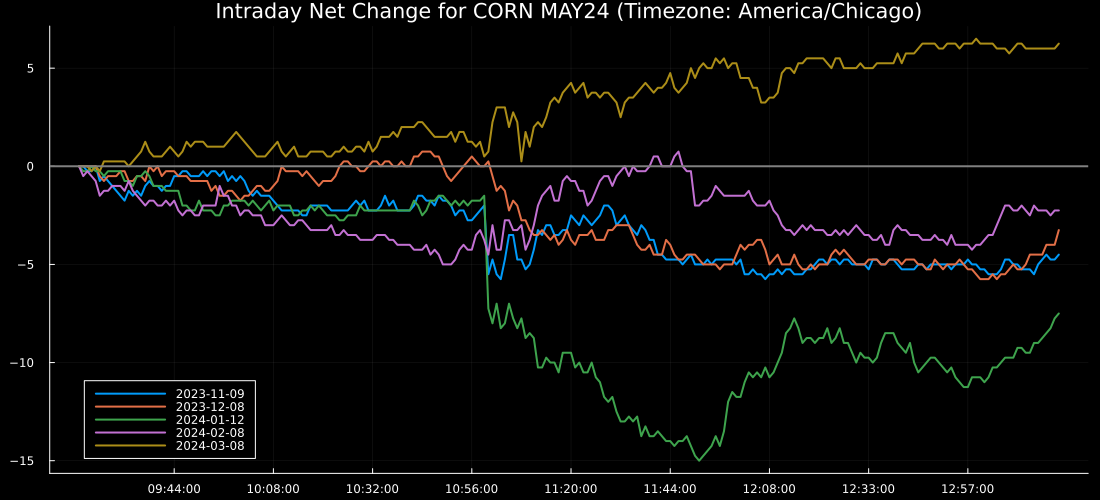

In [16]:
# Step 5 - Prepare and chart our measures...

# Set the plot size
default(size = (1100, 500))

# Pull out the index representing the x-axis - array of PyObjects
idx = collect(index(julia_data))

# Create an array of Julia DateTime objects from the index
julia_datetime_array = [DateTime(2000, 1, 1, getproperty(tm, :hour), getproperty(tm, :minute), getproperty(tm, :second)) for tm in idx]

# Format DateTime objects as HH:MM:SS
times = [Dates.format(dt, "HH:MM:SS") for dt in julia_datetime_array]

# Retrieve the data points...
data = [Array(julia_data[name]) for name in columns(julia_data)]

# Extract the column names
column_names = collect(columns(julia_data))

# Start with a fresh plot
p = Plots.plot()

title = "Intraday Net Change for CORN MAY24 (Timezone: America/Chicago)"

# Plot each line separately with its corresponding label
for (i, column) in enumerate(column_names)
    plot!(times, data[i], label=column, lw=2)
end

title!(title)

# Customize the plot
plot!(background_color = :black, foreground_color = :white)

# Add a horizontal line at zero
hline!([0], color=:grey, linewidth=2, label="")

### Realtime Pricing
As our final example, I will utilize the streaming pricing interfaces available from LSEG to demonstrate working with real-time data by utilizing  a common feature available within the Python library.  With this example, I will subscribe to a set of instruments that populate a live cache.  At any point, you can programmatically pull out real-time data from the cache on an on-demand basis.

In [17]:
# Subscribe to a few instruments and some relevant fields.
# This done by creating a stream definition...
stream = rd.open_pricing_stream(
    universe=["EUR=", "CAD="],
    fields=["DSPLY_NAME", "BID", "ASK"]
)

PyObject <refinitiv.data._access_layer.get_stream.PricingStream object at 0x0000023397632BC0>

In [18]:
# Open the stream...
stream.open()

PyObject <OpenState.Opened: 'Opened'>

At this point, we have opened a subscription to capture live data points from the registered instruments: <em>Euro</em> and the <em>Canadian Dollar</em>.  This specific action has populated our internal cache with real-time values.  Let's view the cache:

In [19]:
# Retrieve and display realtime pricing cache...
stream.get_snapshot()

,Instrument,ASK,BID,DSPLY_NAME
0,EUR=,1.0941,1.0939,RABOBANKGFM LON
1,CAD=,1.3474,1.347,BARCLAYS LON


Because our subscriptions are open, we have a live cache that is updating based on changes in the market. At any point, you can pull down the cache and view the latest values.

In [20]:
stream.get_snapshot()

,Instrument,ASK,BID,DSPLY_NAME
0,EUR=,1.0941,1.0939,RABOBANKGFM LON
1,CAD=,1.3476,1.3471,RABOBANKGFM LON


In [21]:
# Unsubscribe to halt updates
stream.close()

PyObject <OpenState.Closed: 'Closed'>

In [22]:
rd.close_session()